<a href="https://colab.research.google.com/github/Keerthimanga/Unemployment-Analysis-with-Python/blob/main/Copy_of_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
%matplotlib inline
from google.colab import files
import io

up = files.upload()
mydata = pd.read_csv(io.BytesIO(up['Unemployment in India(2)(1).csv']))
mydata

Saving Unemployment in India(2)(1).csv to Unemployment in India(2)(1).csv


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mydata.shape

(768, 7)

In [ ]:
mydata.size

5376

In [ ]:
mydata.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
mydata.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
mydata.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
mydata.duplicated().sum()

27

In [ ]:
mydata.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
mydata['Region'].value_counts()

,count
Region,
Andhra Pradesh,28
Kerala,28
West Bengal,28
Uttar Pradesh,28
Tripura,28
Telangana,28
Tamil Nadu,28
Rajasthan,28
Punjab,28


In [ ]:
region_stats = mydata.groupby('Region')[' Estimated Unemployment Rate (%)'].agg(['min', 'max'])
region_stats = region_stats.rename(columns={'min': 'Minimum Unemployment', 'max': 'Maximum Unemployment'})
min_region = region_stats['Minimum Unemployment'].idxmin()
max_region = region_stats['Maximum Unemployment'].idxmax()

print(f"Region with Minimum Unemployment: {min_region}")
print(f"Region with Maximum Unemployment: {max_region}")

Region with Minimum Unemployment: Assam
Region with Maximum Unemployment: Puducherry


In [ ]:
mydata.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural


In [ ]:
top_10_regions = mydata.groupby('Region')[' Estimated Unemployment Rate (%)'].max().sort_values(ascending=False).head(10)
print(top_10_regions)

Region
Puducherry          76.74
Jharkhand           70.17
Bihar               58.77
Tamil Nadu          53.19
Himachal Pradesh    50.00
Haryana             46.89
Delhi               45.78
Tripura             43.64
Punjab              40.59
Madhya Pradesh      40.49
Name:  Estimated Unemployment Rate (%), dtype: float64


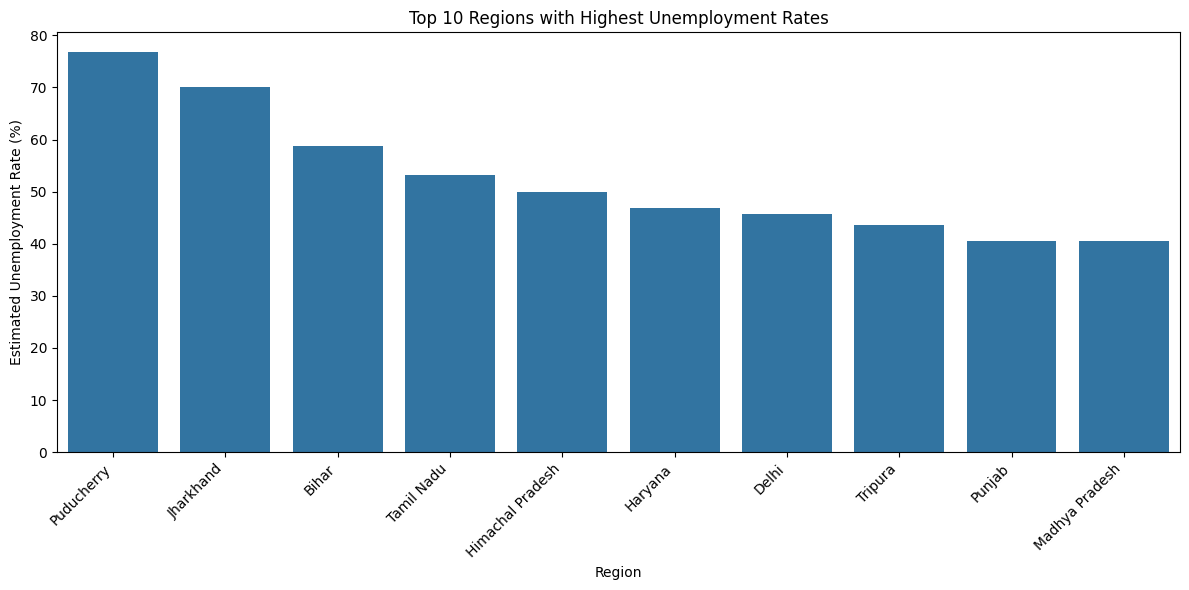

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_regions.index, y=top_10_regions.values)
plt.title('Top 10 Regions with Highest Unemployment Rates')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
region_unemployment = mydata.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()
print(region_unemployment)

Region
Andhra Pradesh       7.477143
Assam                6.428077
Bihar               18.918214
Chandigarh          15.991667
Chhattisgarh         9.240357
Delhi               16.495357
Goa                  9.274167
Gujarat              6.663929
Haryana             26.283214
Himachal Pradesh    18.540357
Jammu & Kashmir     16.188571
Jharkhand           20.585000
Karnataka            6.676071
Kerala              10.123929
Madhya Pradesh       7.406429
Maharashtra          7.557500
Meghalaya            4.798889
Odisha               5.657857
Puducherry          10.215000
Punjab              12.031071
Rajasthan           14.058214
Sikkim               7.249412
Tamil Nadu           9.284286
Telangana            7.737857
Tripura             28.350357
Uttar Pradesh       12.551429
Uttarakhand          6.582963
West Bengal          8.124643
Name:  Estimated Unemployment Rate (%), dtype: float64


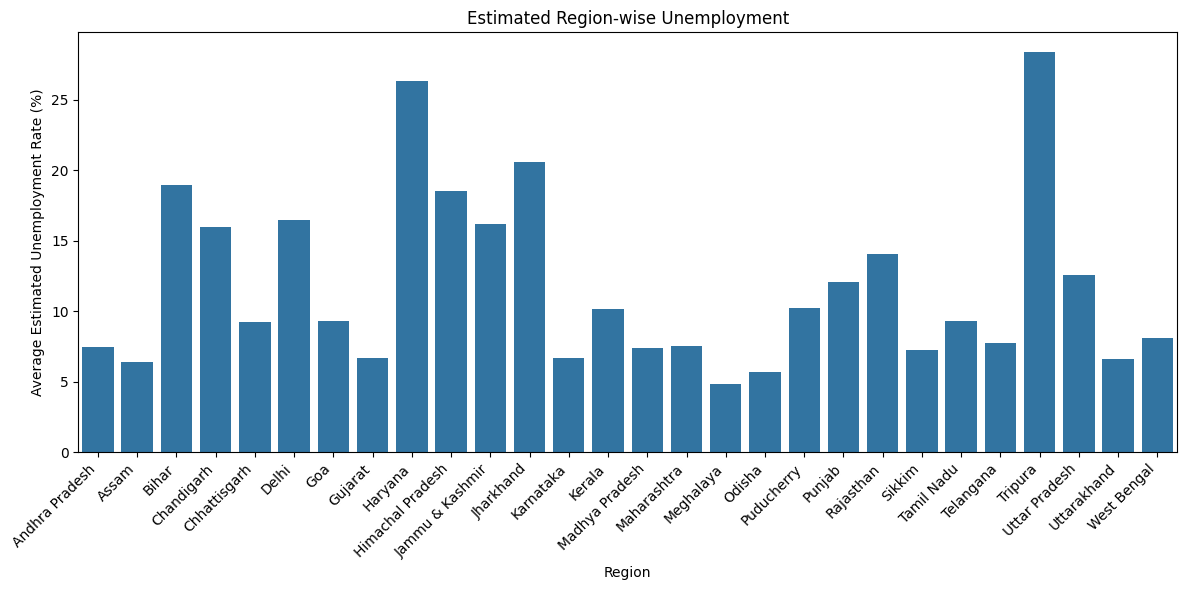

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=region_unemployment.index, y=region_unemployment.values)
plt.title('Estimated Region-wise Unemployment')
plt.xlabel('Region')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
region_unemployment = mydata.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()
print(region_unemployment)

Region
Andhra Pradesh       7.477143
Assam                6.428077
Bihar               18.918214
Chandigarh          15.991667
Chhattisgarh         9.240357
Delhi               16.495357
Goa                  9.274167
Gujarat              6.663929
Haryana             26.283214
Himachal Pradesh    18.540357
Jammu & Kashmir     16.188571
Jharkhand           20.585000
Karnataka            6.676071
Kerala              10.123929
Madhya Pradesh       7.406429
Maharashtra          7.557500
Meghalaya            4.798889
Odisha               5.657857
Puducherry          10.215000
Punjab              12.031071
Rajasthan           14.058214
Sikkim               7.249412
Tamil Nadu           9.284286
Telangana            7.737857
Tripura             28.350357
Uttar Pradesh       12.551429
Uttarakhand          6.582963
West Bengal          8.124643
Name:  Estimated Unemployment Rate (%), dtype: float64


<ipython-input-92-bae8aa0f6ae8>:3: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

<ipython-input-92-bae8aa0f6ae8>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-92-bae8aa0f6ae8>:4: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14



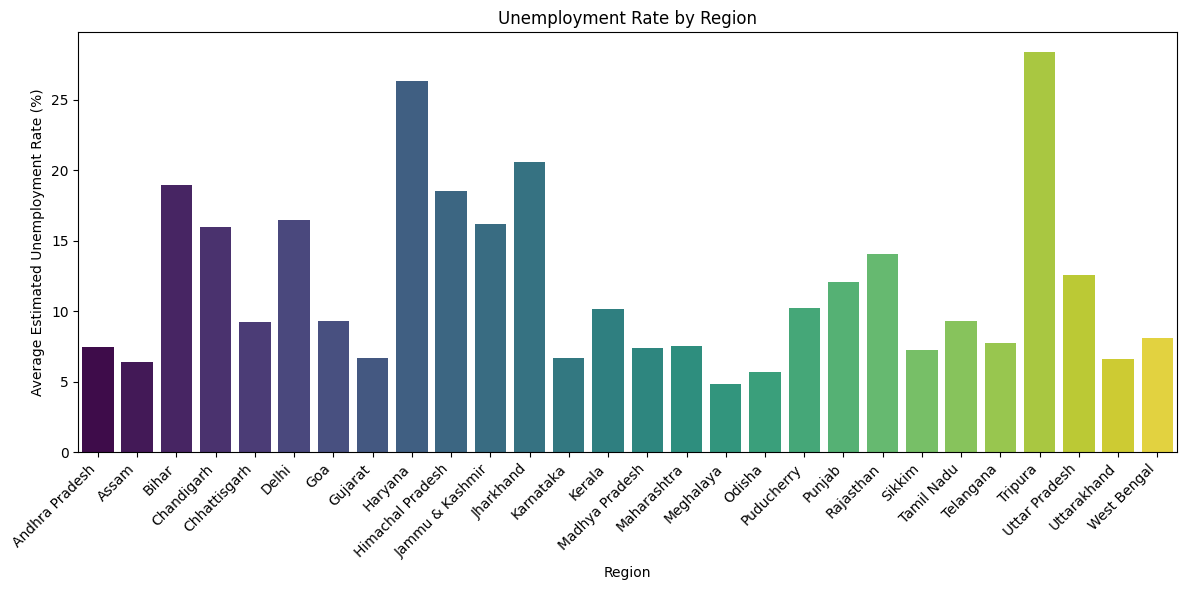

In [ ]:
plt.figure(figsize=(12, 6))
num_regions = len(region_unemployment.index)
colors = plt.cm.get_cmap('viridis', num_regions)  # Get a colormap with enough colors
sns.barplot(x=region_unemployment.index, y=region_unemployment.values, palette=colors(np.arange(num_regions)))
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()